In [1]:
import sys
import os.path
import pylab as plt
from zedstat.zedstat import zedstat
import pandas as pd

In [2]:
#
# order is order of spline used for smoothing
# alpha is significance level
# prevalence is prevalence of positive class
# 
zt=zedstat(df=pd.read_csv('examples_data/roc2.csv'),
           order=3, 
           total_samples=100000,
           positive_samples=1000,
           alpha=0.1,
           prevalence=.01)

In [3]:
# compute smoothened roc and other performance measures
zt.smooth(STEP=0.001)
zt.allmeasures(interpolate=True)
zt.usample(precision=3)
zt.getBounds()

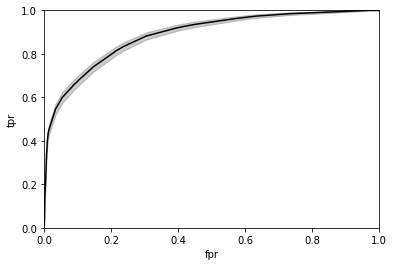

In [4]:
ax=plt.gca()
ax=zt.get().tpr.plot(ax=ax,color='k')
plt.fill_between(x=zt.get().index, y1=zt.df_lim['U'].tpr,y2=zt.df_lim['L'].tpr, color='k',alpha=.2)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel('tpr');

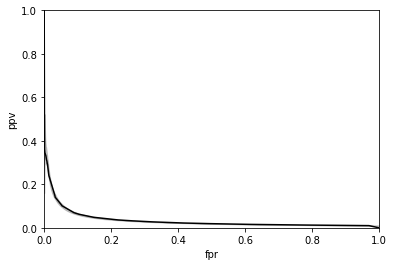

In [19]:
ax=plt.gca()
ax=zt.get().ppv.plot(ax=ax,color='k')
plt.fill_between(x=zt.get().index, y1=zt.df_lim['U'].ppv,y2=zt.df_lim['L'].ppv, color='k',alpha=.2)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel('ppv');

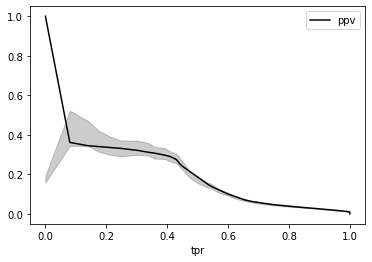

In [17]:
ax=plt.gca()
ax=zt.get().plot(ax=ax,x='tpr',y='ppv',color='k')
plt.fill_between(x=zt.get()['tpr'], y1=zt.df_lim['U'].ppv,y2=zt.df_lim['L'].ppv, color='k',alpha=.2)

In [14]:
zt.get()

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.000,0.000000,1.000000,0.990000,0.990000,59.735339,1.000000,1.470513
0.001,0.080175,0.361694,0.989363,0.990781,56.153067,0.921153,0.380974
0.002,0.139650,0.345121,0.988686,0.991363,52.201465,0.862598,0.349475
0.003,0.175802,0.340570,0.988262,0.991717,51.172271,0.826949,0.332624
0.004,0.211953,0.336019,0.987838,0.992071,50.143077,0.791299,0.315774
...,...,...,...,...,...,...,...
0.996,1.000000,0.001330,0.013881,1.000753,1.004043,0.000000,0.001358
0.997,1.000000,0.000998,0.012911,1.000781,1.003032,0.000000,0.001356
0.998,1.000000,0.000665,0.011941,1.000809,1.002022,0.000000,0.001355


In [15]:
zt.df_lim['U']

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.000,0.000000,0.194091,0.990000,0.990000,87.940809,1.000000,1.470513
0.001,0.108433,0.522737,0.990094,0.991066,108.432661,0.892460,0.380974
0.002,0.175718,0.470189,0.989777,0.991726,87.859139,0.825934,0.349475
0.003,0.215411,0.420387,0.989184,0.992114,71.803552,0.786950,0.332624
0.004,0.254480,0.391219,0.988585,0.992496,63.620009,0.748514,0.315774
...,...,...,...,...,...,...,...
0.996,1.000000,0.010040,0.013960,1.000000,1.004016,0.000000,0.001358
0.997,1.000000,0.010030,0.012970,1.000000,1.003009,0.000000,0.001356
0.998,1.000000,0.010020,0.011980,1.000000,1.002004,0.000000,0.001355


In [16]:
zt.df_lim['L']

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.000,0.000000,0.159797,0.990000,0.990000,41.227870,1.000000,1.470513
0.001,0.051917,0.344011,0.989529,0.990505,51.917193,0.949032,0.380974
0.002,0.103582,0.343462,0.989056,0.991009,51.791006,0.898214,0.349475
0.003,0.136193,0.314393,0.988392,0.991324,45.397614,0.866406,0.332624
0.004,0.169427,0.299644,0.987734,0.991647,42.356667,0.833909,0.315774
...,...,...,...,...,...,...,...
0.996,1.000000,0.010040,0.013960,1.000000,1.004016,0.000000,0.001358
0.997,1.000000,0.010030,0.012970,1.000000,1.003009,0.000000,0.001356
0.998,1.000000,0.010020,0.011980,1.000000,1.002004,0.000000,0.001355


In [7]:
# compute auc with confidence bounds
zt.auc(alpha=.001)

(0.8875903790087464, 0.9127429179592511, 0.8624378400582415)

In [8]:
# required sample size
zt.samplesize(delta_auc=.1)

26.99420757849582

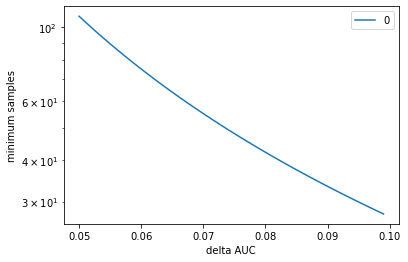

In [9]:
import numpy as np
pd.DataFrame(np.array([zt.samplesize(delta_auc=a) 
                       for a in np.arange(.05,.1,.001)]),
             np.arange(.05,.1,.001)).plot(logy=True)
plt.gca().set_xlabel('delta AUC')
plt.gca().set_ylabel('minimum samples');

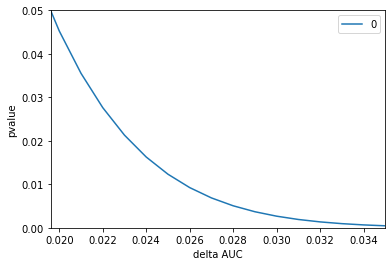

In [10]:
pd.DataFrame([zt.pvalue(delta_auc=a) for a in np.arange(0.001,.1,.001)],
             np.arange(0.001,.1,.001)).plot()
plt.gca().set_ylim(0,0.05)   
plt.gca().set_xlim(0.0196,0.035)   
plt.gca().set_xlabel('delta AUC')
plt.gca().set_ylabel('pvalue');

In [11]:
zt.operating_zone(LRminus=.65)
rf0,txt0=zt.interpret(fpr=zt._operating_zone.fpr.values[0],number_of_positives=10)
rf1,txt1=zt.interpret(fpr=zt._operating_zone.fpr.values[1],number_of_positives=10)
display(zt._operating_zone)
print('high precision operation:\n','\n '.join(txt0))
print('\n')
print('high recall operation:\n','\n '.join(txt1))

,fpr,tpr,ppv,acc,npv,LR+,LR-,threshold
high precision,0.008,0.358115,0.307628,0.985499,0.993506,43.99784,0.647145,0.234186
high sensitivity,0.064,0.616202,0.091559,0.932393,0.995877,10.00695,0.409831,0.031257


high precision operation:
 For every 10 positive instances
 we raise 26 flags,
 out of which 5 are true positives
 21 are false alarms
 5 cases are missed


high recall operation:
 For every 10 positive instances
 we raise 44 flags,
 out of which 6 are true positives
 38 are false alarms
 4 cases are missed


In [12]:
pd.options.display.html.use_mathjax = False
from zedstat.textable import tablewithbounds
xf=tablewithbounds(zt.get(),zt.usample(zt.df_lim['U']),zt.usample(zt.df_lim['L']))#.to_csv('table.csv')
xf.loc[zt._operating_zone.fpr.values]

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.008,$0.358 \pm 0.049$,$0.307 \pm 0.029$,$0.985 \pm 0.000$,$0.993 \pm 0.000$,$43.99 \pm 6.236$,$0.647 \pm 0.050$,0.234186
0.064,$0.616 \pm 0.050$,$0.091 \pm 0.006$,$0.932 \pm 0.000$,$0.995 \pm 0.000$,$10.00 \pm 0.790$,$0.409 \pm 0.054$,0.031257


In [13]:
from zedstat.textable import textable
textable(xf,tabname='tmp.tex',FORMAT='%1.3f',INDEX=True,LNTERM='\\\\\\hline\n')     